In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from datetime import date
from statistics import median

In [2]:
df = pd.read_csv('./movie_metadata.csv')
df.drop_duplicates()
df.head(20)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [3]:
#What's the probability that a movie was longer than an hour and a half? Two hours?
(df['duration'][df.duration > 90].count()) / df.duration.dropna().count()

0.810461416070008

In [90]:
(df['duration'][df.duration > 120].count()) / df.duration.dropna().count()

0.21221161495624502

In [5]:
#What's the probability that a movie was directed by Stephen Spielberg?
movies = df['duration'][df.director_name == 'Steven Spielberg'].count()

all_movies = df['movie_title'].count()

movies / all_movies

0.005155661312710688

In [6]:
#What's the probability that a movie directed by Clint Eastwood will gross under budget?
clint_count = df[df.director_name == 'Clint Eastwood'].count()
clint_gross = df[df.director_name == 'Clint Eastwood'][df['gross'] < df['budget']].count()

clint_gross / clint_count

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


color                        0.350000
director_name                0.350000
num_critic_for_reviews       0.350000
duration                     0.350000
director_facebook_likes      0.350000
actor_3_facebook_likes       0.350000
actor_2_name                 0.350000
actor_1_facebook_likes       0.350000
gross                        0.368421
genres                       0.350000
actor_1_name                 0.350000
movie_title                  0.350000
num_voted_users              0.350000
cast_total_facebook_likes    0.350000
actor_3_name                 0.350000
facenumber_in_poster         0.350000
plot_keywords                0.350000
movie_imdb_link              0.350000
num_user_for_reviews         0.350000
language                     0.350000
country                      0.350000
content_rating               0.350000
budget                       0.350000
title_year                   0.350000
actor_2_facebook_likes       0.350000
imdb_score                   0.350000
aspect_ratio

In [18]:
#What's the probability that a movie generally grossed more than its budget?
df[df['gross'] > df['budget']].count()
movies_gross_over_budget = 2049

df.gross.count()
total_gross_movies = 4159

movies_gross_over_budget / total_gross_movies

0.492666506371724

In [95]:
#What's the probability that a movie grossed over the average gross of this data set?
total_gross_movies = df.gross.sum()
movies_with_gross = df.gross.count()

average_gross = total_gross_movies / movies_with_gross

above_average = df[df.gross > average_gross].gross.count()

above_average / movies_with_gross

0.31882664101947583

In [ ]:
#For ratings we'll consider a movie with at least a 6/10 to be worth renting, if not seeing in theaters. 
#A false positive would be a movie that was highly-rated but did poorly in the box office (gross < budget). 
#A false negative would be a movie that was poorly-rated but did great in the box office (gross > budget).
six_or_above = df[df.imdb_score >= 6].imdb_score.count()
#33589

false_positive_count = df[df.imdb_score >= 6][df.gross < df.budget][['movie_title', 'imdb_score']].count()
#1225

false_positive_count / df.imdb_score.count()
#.242

In [ ]:
#In the IMDB dataset, what are the false positive and false negative rates? Can you provide some examples of each?
false_negative_count = df[df.imdb_score < 6][df.gross > df.budget][['movie_title', 'imdb_score']].count()

false_negative_count / df.imdb_score.count()

In [ ]:
#If I’m a production studio exec and Tom Hanks is starring in my movie but I’m feeling uncertain about 
#whether we should keep him (will he make as much money as we want?), 
#tell me should I keep him in the movie or switch him out for Harrison Ford?

tom = df[df.actor_1_name == 'Tom Hanks'].gross.mean()
tom / df[df.actor_1_name == 'Tom Hanks'].budget.mean()
#136023294


#Tom Hanks has higher grossing movies on average

In [ ]:
harry = df[df.actor_1_name == 'Harrison Ford'].gross.mean()
harry / df[df.actor_1_name == 'Harrison Ford'].budget.mean()
#135662246

In [ ]:
#Same as above, but I’m judging on the ratings of the movie instead of the gross/budget.
df[df.actor_1_name == 'Tom Hanks'].imdb_score.mean()
#7.425

In [97]:
df[df.actor_1_name == 'Harrison Ford'].imdb_score.mean()
#7.25

7.15925925925926

In [ ]:
#What’s the probability that a movie’s length will be between 1hr 10mins and 1h 30mins?
duration_movies = df['duration'][df.duration > 70][df.duration < 90].count()

duration_movies / all_movies

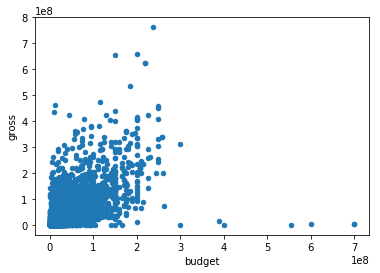

In [14]:
#How does the distribution of movie budgets compare to the movie gross values?
df[df.budget < 1000000000.0][['budget', 'gross']].plot(x='budget', y='gross', kind='scatter')

In [82]:
#Which genre trends toward the highest gross-to-budget ratio? 
#You may have to do some extra parsing to answer this question.
# pd.DataFrame(df[['genres', 'gross']]).sort_values('gross' ,ascending=False).head(5)

df.genres.apply(lambda x: x.split('|'))
genre_gross = df[['genres', '']]

0                    [Action, Adventure, Fantasy, Sci-Fi]
1                            [Action, Adventure, Fantasy]
2                           [Action, Adventure, Thriller]
3                                      [Action, Thriller]
4                                           [Documentary]
5                             [Action, Adventure, Sci-Fi]
6                            [Action, Adventure, Romance]
7       [Adventure, Animation, Comedy, Family, Fantasy...
8                             [Action, Adventure, Sci-Fi]
9                   [Adventure, Family, Fantasy, Mystery]
10                            [Action, Adventure, Sci-Fi]
11                            [Action, Adventure, Sci-Fi]
12                                    [Action, Adventure]
13                           [Action, Adventure, Fantasy]
14                           [Action, Adventure, Western]
15                   [Action, Adventure, Fantasy, Sci-Fi]
16                   [Action, Adventure, Family, Fantasy]
17            

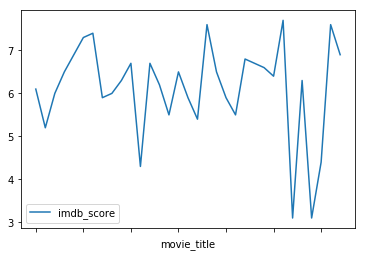

In [73]:
#Nicolas Cage is known for starring in some pretty bad movies. 
#Are his movies statistically significantly worse (i.e. in rating) than the rest of the IMDB 5000+?
df[df.actor_1_name == 'Nicolas Cage'][['imdb_score', 'movie_title']].plot(x='movie_title', y='imdb_score')


In [65]:
#Have any years grossed a statistically-significant higher amount than the other years?

gross_yearly = df[['title_year', 'gross']].groupby('title_year')
sum_gross = gross_yearly['gross'].sum()
sum_gross.sort_values(ascending=False).head()

title_year
2012.0    1.138011e+10
2013.0    1.050161e+10
2014.0    1.042283e+10
2009.0    9.934600e+09
2010.0    9.931757e+09
Name: gross, dtype: float64

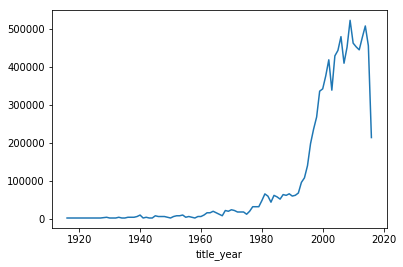

In [98]:
gross_yearly['title_year'].sum().plot()

In [103]:
df[df.actor_1_name == 'Christopher Nolan'][['director_facebook_likes', 'num_critic_for_reviews']].plot(x='num_critic_for_reviews', y='director_facebook_likes', kind='scatter')
df[df.actor_1_name == 'Nicolas Cage'][['imdb_score', 'movie_title']].plot(x='movie_title', y='imdb_score')

ValueError: scatter requires x column to be numeric